In [24]:
from random import randint

import pyqtgraph as pg
from PyQt5 import QtCore, QtWidgets
from PyQt5.QtCore import Qt
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
from matplotlib import pyplot as plt
from Agents.Boid import Boid
from Agents.Mountain import Mountain
from Agents.Predator import Predator
from tqdm import tqdm

In [25]:
time = 100
size = 4000

In [3]:
def cohesion(num, bv=40, pv=100, boids_num=200, mountain_rate=0.1, predator_rate=0.02):
    boids = [Boid(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, visualRange=bv, seed=i) for i in range(boids_num)]
    mountains = [Mountain(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, seed=i) for i in range(boids_num*mountain_rate)]
    predators = [Predator(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, visualRange=pv, seed=i) for i in range(boids_num*predator_rate)]
    cohesion = []
    for t in tqdm(range(time)):
        tot = 0
        cohesion_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            boid_cohesion = boid.cohension(boids)
            if boid_cohesion > 0:
                tot += boid_cohesion
                cohesion_num += 1
        tot /= len(boids)
        cohesion.append(tot)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return cohesion

def alignment(num, bv=40, pv=100, boids_num=200, mountain_rate=0.1, predator_rate=0.02):
    boids = [Boid(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, visualRange=bv, seed=i) for i in range(boids_num)]
    mountains = [Mountain(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, seed=i) for i in range(boids_num*mountain_rate)]
    predators = [Predator(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, visualRange=pv, seed=i) for i in range(boids_num*predator_rate)]
    alignment = []
    for t in tqdm(range(time)):
        tot = 0
        alignment_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            boid_alignment = boid.alignment(boids)
            if boid_alignment > 0:
                tot += boid_alignment
                alignment_num += 1
        tot /= len(boids)
        alignment.append(tot)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return alignment

def centeringPosition(num, bv=40, pv=100, boids_num=200, mountain_rate=0.1, predator_rate=0.02):
    boids = [Boid(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, visualRange=bv, seed=i) for i in range(boids_num)]
    mountains = [Mountain(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, seed=i) for i in range(boids_num*mountain_rate)]
    predators = [Predator(xstr=size/4, ystr=size/4,xlim=size/2, ylim=size/2, visualRange=pv, seed=i) for i in range(boids_num*predator_rate)]
    ceneteringPosX = []
    ceneteringPosY = []
    for t in tqdm(range(time)):
        tot = 0
        alignment_num = 0
        for boid in boids:
            boid.updateBoid(boids, predators, mountains, 0, size, 0, size, num)
            X, Y = boid.centerPosition(boids)
            ceneteringPosX.append(X)
            ceneteringPosY.append(Y)
        for predator in predators:
            predator.updatePredator(boids, 0, size, 0, size)
    return ceneteringPosX, ceneteringPosY

100%|██████████| 100/100 [00:04<00:00, 23.85it/s]


In [ ]:
# 0: raw, 1: all, 2: pred, 3: mountain

# regular alignment and cohesion and centering position
alignment_raw = alignment(0)
alignment_all = alignment(1)
alignment_pred = alignment(2)
alignment_mountain = alignment(3)

cohesion_raw = cohesion(0)
cohesion_all = cohesion(1)
cohesion_pred = cohesion(2)
cohesion_mountain = cohesion(3)

ceneteringPosX_raw, ceneteringPosY_raw = centeringPosition(0)
ceneteringPosX_all, ceneteringPosY_all = centeringPosition(1)
ceneteringPosX_pred, ceneteringPosY_pred = centeringPosition(2)
ceneteringPosX_mountain, ceneteringPosY_mountain = centeringPosition(3)


In [ ]:
# changing visual range of boids
# decrease
alignment_raw_bv_l = alignment(0, bv=20)
alignment_all_bv_l = alignment(1, bv=20)
alignment_pred_bv_l = alignment(2, bv=20)
alignment_mountain_bv_l = alignment(3, bv=20)

cohesion_raw_bv_l = cohesion(0, bv=20)
cohesion_all_bv_l = cohesion(1, bv=20)
cohesion_pred_bv_l = cohesion(2, bv=20)
cohesion_mountain_bv_l = cohesion(3, bv=20)

ceneteringPosX_raw_bv_l, ceneteringPosY_raw_bv_l = centeringPosition(0, bv=20)
ceneteringPosX_all_bv_l, ceneteringPosY_all_bv_l = centeringPosition(1, bv=20)
ceneteringPosX_pred_bv_l, ceneteringPosY_pred_bv_l = centeringPosition(2, bv=20)
ceneteringPosX_mountain_bv_l, ceneteringPosY_mountain_bv_l = centeringPosition(3, bv=20)

# increase
alignment_raw_bv_h = alignment(0, bv=60)
alignment_all_bv_h = alignment(1, bv=60)
alignment_pred_bv_h = alignment(2, bv=60)
alignment_mountain_bv_h = alignment(3, bv=60)

cohesion_raw_bv_h = cohesion(0, bv=60)
cohesion_all_bv_h = cohesion(1, bv=60)
cohesion_pred_bv_h = cohesion(2, bv=60)
cohesion_mountain_bv_h = cohesion(3, bv=60)

ceneteringPosX_raw_bv_h, ceneteringPosY_raw_bv_h = centeringPosition(0, bv=60)
ceneteringPosX_all_bv_h, ceneteringPosY_all_bv_h = centeringPosition(1, bv=60)
ceneteringPosX_pred_bv_h, ceneteringPosY_pred_bv_h = centeringPosition(2, bv=60)
ceneteringPosX_mountain_bv_h, ceneteringPosY_mountain_bv_h = centeringPosition(3, bv=60)

In [ ]:
# changing visual range of predators
# decrease
alignment_raw_pv_l = alignment(0, pv=50)
alignment_all_pv_l = alignment(1, pv=50)
alignment_pred_pv_l = alignment(2, pv=50)
alignment_mountain_pv_l = alignment(3, pv=50)

cohesion_raw_pv_l = cohesion(0, pv=50)
cohesion_all_pv_l = cohesion(1, pv=50)
cohesion_pred_pv_l = cohesion(2, pv=50)
cohesion_mountain_pv_l = cohesion(3, pv=50)

ceneteringPosX_raw_pv_l, ceneteringPosY_raw_pv_l = centeringPosition(0, pv=50)
ceneteringPosX_all_pv_l, ceneteringPosY_all_pv_l = centeringPosition(1, pv=50)
ceneteringPosX_pred_pv_l, ceneteringPosY_pred_pv_l = centeringPosition(2, pv=50)
ceneteringPosX_mountain_pv_l, ceneteringPosY_mountain_pv_l = centeringPosition(3, pv=50)

# increase
alignment_raw_pv_h = alignment(0, pv=150)
alignment_all_pv_h = alignment(1, pv=150)
alignment_pred_pv_h = alignment(2, pv=150)
alignment_mountain_pv_h = alignment(3, pv=150)

cohesion_raw_pv_h = cohesion(0, pv=150)
cohesion_all_pv_h = cohesion(1, pv=150)
cohesion_pred_pv_h = cohesion(2, pv=150)
cohesion_mountain_pv_h = cohesion(3, pv=150)

ceneteringPosX_raw_pv_h, ceneteringPosY_raw_pv_h = centeringPosition(0, pv=150)
ceneteringPosX_all_pv_h, ceneteringPosY_all_pv_h = centeringPosition(1, pv=150)
ceneteringPosX_pred_pv_h, ceneteringPosY_pred_pv_h = centeringPosition(2, pv=150)
ceneteringPosX_mountain_pv_h, ceneteringPosY_mountain_pv_h = centeringPosition(3, pv=150)

In [ ]:
# changing the ratio of predators
# decrease
alignment_raw_pr_l = alignment(0, predator_rate=0.1)
alignment_all_pr_l = alignment(1, predator_rate=0.1)
alignment_pred_pr_l = alignment(2, predator_rate=0.1)
alignment_mountain_pr_l = alignment(3, predator_rate=0.1)

cohesion_raw_pr_l = cohesion(0, predator_rate=0.1)
cohesion_all_pr_l = cohesion(1, predator_rate=0.1)
cohesion_pred_pr_l = cohesion(2, predator_rate=0.1)
cohesion_mountain_pr_l = cohesion(3, predator_rate=0.1)

ceneteringPosX_raw_pr_l, ceneteringPosY_raw_pr_l = centeringPosition(0, predator_rate=0.1)
ceneteringPosX_all_pr_l, ceneteringPosY_all_pr_l = centeringPosition(1, predator_rate=0.1)
ceneteringPosX_pred_pr_l, ceneteringPosY_pred_pr_l = centeringPosition(2, predator_rate=0.1)
ceneteringPosX_mountain_pr_l, ceneteringPosY_mountain_pr_l = centeringPosition(3, predator_rate=0.1)

# increase
alignment_raw_pr_h = alignment(0, predator_rate=0.3)
alignment_all_pr_h = alignment(1, predator_rate=0.3)
alignment_pred_pr_h = alignment(2, predator_rate=0.3)
alignment_mountain_pr_h = alignment(3, predator_rate=0.3)

cohesion_raw_pr_h = cohesion(0, predator_rate=0.3)
cohesion_all_pr_h = cohesion(1, predator_rate=0.3)
cohesion_pred_pr_h = cohesion(2, predator_rate=0.3)
cohesion_mountain_pr_h = cohesion(3, predator_rate=0.3)

ceneteringPosX_raw_pr_h, ceneteringPosY_raw_pr_h = centeringPosition(0, predator_rate=0.3)
ceneteringPosX_all_pr_h, ceneteringPosY_all_pr_h = centeringPosition(1, predator_rate=0.3)
ceneteringPosX_pred_pr_h, ceneteringPosY_pred_pr_h = centeringPosition(2, predator_rate=0.3)
ceneteringPosX_mountain_pr_h, ceneteringPosY_mountain_pr_h = centeringPosition(3, predator_rate=0.3)


In [ ]:
# changing the ratio of mountains
# decrease
alignment_raw_mr_l = alignment(0, mountain_rate=0.1)
alignment_all_mr_l = alignment(1, mountain_rate=0.1)
alignment_pred_mr_l = alignment(2, mountain_rate=0.1)
alignment_mountain_mr_l = alignment(3, mountain_rate=0.1)

cohesion_raw_mr_l = cohesion(0, mountain_rate=0.1)
cohesion_all_mr_l = cohesion(1, mountain_rate=0.1)
cohesion_pred_mr_l = cohesion(2, mountain_rate=0.1)
cohesion_mountain_mr_l = cohesion(3, mountain_rate=0.1)

ceneteringPosX_raw_mr_l, ceneteringPosY_raw_mr_l = centeringPosition(0, mountain_rate=0.1)
ceneteringPosX_all_mr_l, ceneteringPosY_all_mr_l = centeringPosition(1, mountain_rate=0.1)
ceneteringPosX_pred_mr_l, ceneteringPosY_pred_mr_l = centeringPosition(2, mountain_rate=0.1)
ceneteringPosX_mountain_mr_l, ceneteringPosY_mountain_mr_l = centeringPosition(3, mountain_rate=0.1)

# increase
alignment_raw_mr_h = alignment(0, mountain_rate=0.3)
alignment_all_mr_h = alignment(1, mountain_rate=0.3)
alignment_pred_mr_h = alignment(2, mountain_rate=0.3)
alignment_mountain_mr_h = alignment(3, mountain_rate=0.3)


In [4]:
max_cohesion, min_cohesion = max(cohesion_raw), min(cohesion_raw)
max_alignment, min_alignment = max(alignment_raw), min(alignment_raw)
cohesion_raw_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw]
cohesion_mountain_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain]
cohesion_pred_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred]
cohesion_all_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all]
alignment_raw_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw]
alignment_mountain_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain]
alignment_pred_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred]
alignment_all_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all]

In [ ]:
plt.plot(list(range(time)), cohesion_raw_new, label="cohesion_raw")
plt.plot(list(range(time)), cohesion_all_new, label="cohesion_all")
plt.plot(list(range(time)), cohesion_pred_new, label="cohesion_pred")
plt.plot(list(range(time)), cohesion_mountain_new, label="cohesion_mountain")
plt.xlabel("Time Step")
plt.ylabel("Cohesion Factor")
plt.legend()
plt.savefig("cohesion.png")
plt.show()

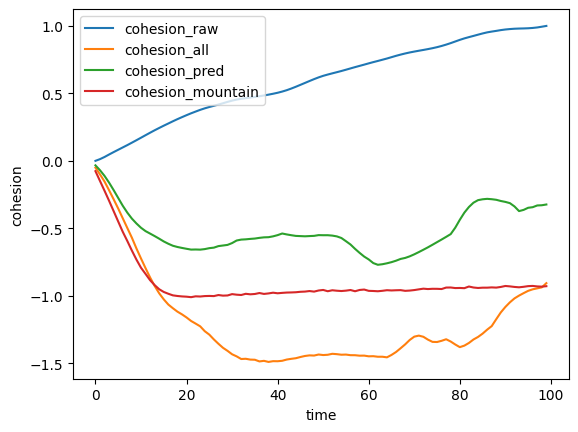

In [5]:
plt.plot(list(range(time)), alignment_raw, label="alignment_raw")
plt.plot(list(range(time)), alignment_all, label="alignment_all")
plt.plot(list(range(time)), alignment_pred, label="alignment_pred")
plt.plot(list(range(time)), alignment_mountain, label="alignment_mountain")
plt.xlabel("Time Step")
plt.ylabel("Alignment Factor")
plt.legend()
plt.savefig("alignment.png")
plt.show()

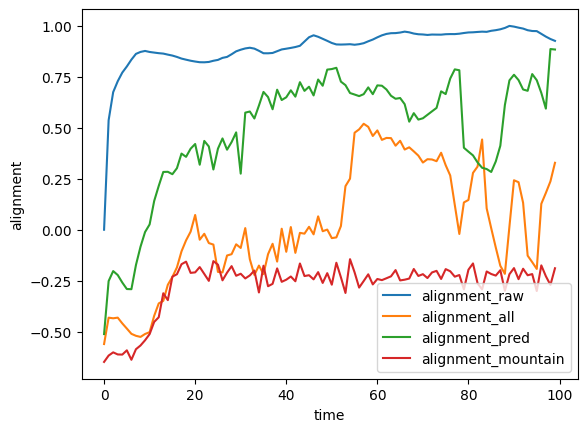

In [6]:
plt.plot(ceneteringPosX_raw, ceneteringPosY_raw, label="cohesion_raw")
plt.plot(ceneteringPosX_all, ceneteringPosY_all, label="cohesion_all")
plt.plot(ceneteringPosX_pred, ceneteringPosY_pred, label="cohesion_pred")
plt.plot(ceneteringPosX_mountain, ceneteringPosY_mountain, label="cohesion_mountain")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.xlim(0, size)
plt.ylim(0, size)
plt.legend()
plt.savefig("cohesion_position.png")
plt.show()

In [26]:
cohesion_raw_bv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw_bv_l]
cohesion_mountain_bv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain_bv_l]
cohesion_pred_bv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred_bv_l]
cohesion_all_bv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all_bv_l]

alignment_raw_bv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw_bv_l]
alignment_mountain_bv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain_bv_l]
alignment_pred_bv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred_bv_l]
alignment_all_bv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all_bv_l]

cohesion_all_bv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all_bv_h]
cohesion_mountain_bv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain_bv_h]
cohesion_pred_bv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred_bv_h]
cohesion_raw_bv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw_bv_h]

alignment_all_bv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all_bv_h]
alignment_mountain_bv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain_bv_h]
alignment_pred_bv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred_bv_h]
alignment_raw_bv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw_bv_h]

In [ ]:
plt.plot(list(range(time)), cohesion_pred_bv_l_new, label="Lower Vision")
plt.plot(list(range(time)), cohesion_pred_new, label="Regular Vision")
plt.plot(list(range(time)), cohesion_pred_bv_h_new, label="Higher Vision")
plt.xlabel("Time Step")
plt.ylabel("Cohesion Factor")
plt.legend()
plt.savefig("cohesion_bv.png")
plt.show()

In [ ]:
plt.plot(list(range(time)), alignment_pred_bv_l_new, label="Lower Vision")
plt.plot(list(range(time)), alignment_pred_new, label="Regular Vision")
plt.plot(list(range(time)), alignment_pred_bv_h_new, label="Higher Vision")
plt.xlabel("Time Step")
plt.ylabel("Alignment Factor")
plt.legend()
plt.savefig("alignment_bv.png")
plt.show()

: 

In [ ]:
cohesion_raw_pv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw_pv_h]
cohesion_mountain_pv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain_pv_h]
cohesion_pred_pv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred_pv_h]
cohesion_all_pv_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all_pv_h]

alignment_raw_pv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw_pv_h]
alignment_mountain_pv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain_pv_h]
alignment_pred_pv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred_pv_h]
alignment_all_pv_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all_pv_h]

cohesion_raw_pv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw_pv_l]
cohesion_mountain_pv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain_pv_l]
cohesion_pred_pv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred_pv_l]
cohesion_all_pv_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all_pv_l]

alignment_raw_pv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw_pv_l]
alignment_mountain_pv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain_pv_l]
alignment_pred_pv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred_pv_l]
alignment_all_pv_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all_pv_l]


In [ ]:
plt.plot(list(range(time)), cohesion_pred_bv_l_new, label="Lower Vision")
plt.plot(list(range(time)), cohesion_pred_new, label="Regular Vision")
plt.plot(list(range(time)), cohesion_pred_bv_h_new, label="Higher Vision")
plt.xlabel("Time Step")
plt.ylabel("Cohesion Factor")
plt.legend()
plt.savefig("cohesion_bv.png")
plt.show()

In [ ]:
plt.plot(list(range(time)), alignment_pred_bv_l_new, label="Lower Vision")
plt.plot(list(range(time)), alignment_pred_new, label="Regular Vision")
plt.plot(list(range(time)), alignment_pred_bv_h_new, label="Higher Vision")
plt.xlabel("Time Step")
plt.ylabel("Alignment Factor")
plt.legend()
plt.savefig("alignment_bv.png")
plt.show()

In [27]:
cohesion_all_pr_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all_pr_h]
cohesion_mountain_pr_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain_pr_h]
cohesion_pred_pr_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred_pr_h]
cohesion_raw_pr_h_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw_pr_h]

alignment_all_pr_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all_pr_h]
alignment_mountain_pr_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain_pr_h]
alignment_pred_pr_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred_pr_h]
alignment_raw_pr_h_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw_pr_h]

cohesion_all_pr_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_all_pr_l]
cohesion_mountain_pr_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_mountain_pr_l]
cohesion_pred_pr_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_pred_pr_l]
cohesion_raw_pr_l_new = [1 - (i - min_cohesion) / (max_cohesion - min_cohesion) for i in cohesion_raw_pr_l]

alignment_all_pr_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_all_pr_l]
alignment_mountain_pr_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_mountain_pr_l]
alignment_pred_pr_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_pred_pr_l]
alignment_raw_pr_l_new = [1 - (i - min_alignment) / (max_alignment - min_alignment) for i in alignment_raw_pr_l]


100%|██████████| 100/100 [00:06<00:00, 14.54it/s]


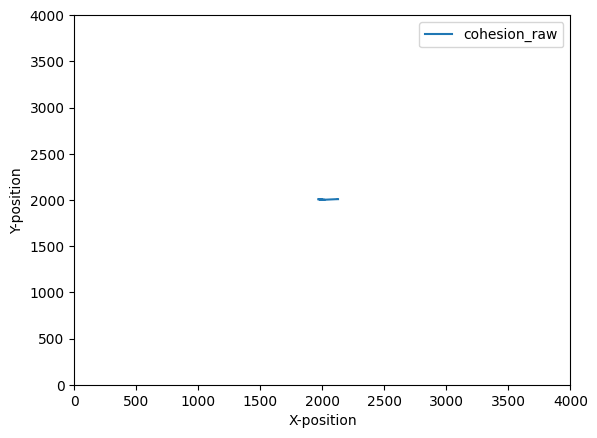

In [28]:
# visual range for predator
# cohesion
# alignment


# visual range for boids
# cohesion
# alignment



In [ ]:
# predator rate
# cohesion
# alignment
# location

# mountain rate
# cohesion
# alignment
# location